#### Entity Relationship between Tables

![tables_relationship](./assets/Entity_Relation_Diagram_v0.1.png)

##### Import Necessery Libs

In [3]:
import pandas as pd

##### Read CSV Files

In [4]:
restaurant_df = pd.read_csv('./data/ODL_RESTAURANT.csv')
order_df = pd.read_csv('./data/ODL_ORDER.csv')
orderItem_df = pd.read_csv('./data/ODL_ORDER_ITEM.csv')
orderables_df = pd.read_csv('./data/ODL_ORDERABLES.csv')

##### Summaries for DF's

In [5]:
# Restaurant
restaurant_df.rename(columns={"id":"restaurant_id"},inplace=True)
restaurant_df.head()
restaurant_df['name'].nunique()


411

In [6]:
order_df.head()

,restaurant_id,creation_date,customer_id,id
0,91,8/25/17 18:49,2858,17265
1,91,12/20/17 11:39,10055,44615
2,91,11/23/18 10:12,13703,137232
3,91,11/2/18 17:33,14698,131091
4,91,7/24/18 9:49,14299,102153


In [7]:
orderItem_df.head()

,order_id,amount,id,orderable_id,Column_useless
0,105807,3,287510,118,1
1,123301,3,335129,118,1
2,15476,3,42649,118,1
3,48254,3,131524,118,1
4,85942,3,233501,118,1


In [8]:
orderables_df.rename(columns={"id":"orderable_id"},inplace=True)
orderables_df.rename(columns={"name":"product_name"},inplace=True)

orderables_df.head()

,price,restaurant_id,orderable_id,product_name
0,17.122222,244,1613,Peach tart
1,28.224527,260,1711,Avocat aux Crevettes avocado and shrimp salad ...
2,27.744477,43,277,"CABERNET SAUVIGNON, Rutherford, Beaulieu"
3,8.925679,68,438,Subgum Shrimp Chow Mein
4,29.446886,45,283,Dom Perignon


##### Manipulating DF's

Merge restaurant and order DF's

In [9]:
rest_order_df = pd.merge(restaurant_df[['name','restaurant_id','city']], order_df, how="inner", on="restaurant_id")
rest_order_df.head(10)

,name,restaurant_id,city,creation_date,customer_id,id
0,Rods 1890s Ranch House,268,San Francisco,6/18/18 17:08,14121,92396
1,Rods 1890s Ranch House,268,San Francisco,9/13/18 22:43,6577,116358
2,Rods 1890s Ranch House,268,San Francisco,12/28/17 12:20,14937,46639
3,Rods 1890s Ranch House,268,San Francisco,10/10/18 20:20,1565,124169
4,Rods 1890s Ranch House,268,San Francisco,10/27/18 21:25,9188,129373
5,Rods 1890s Ranch House,268,San Francisco,3/11/19 13:09,26990,171806
6,Rods 1890s Ranch House,268,San Francisco,1/22/19 22:39,13634,155711
7,Rods 1890s Ranch House,268,San Francisco,1/29/18 16:00,16880,55005
8,Rods 1890s Ranch House,268,San Francisco,9/24/18 14:27,17755,119275
9,Rods 1890s Ranch House,268,San Francisco,5/1/18 21:17,13300,79443


Creating Orders's DF

In [10]:
rest_order_df.rename(columns={"id":"order_id"},inplace=True)
restorder_item_df = pd.merge(rest_order_df, orderItem_df[['order_id', 'amount', 'orderable_id']], how='inner', on='order_id')
restorder_item_df.head()

,name,restaurant_id,city,creation_date,customer_id,order_id,amount,orderable_id
0,Rods 1890s Ranch House,268,San Francisco,6/18/18 17:08,14121,92396,3,1763
1,Rods 1890s Ranch House,268,San Francisco,6/18/18 17:08,14121,92396,2,1764
2,Rods 1890s Ranch House,268,San Francisco,6/18/18 17:08,14121,92396,2,1766
3,Rods 1890s Ranch House,268,San Francisco,6/18/18 17:08,14121,92396,1,1765
4,Rods 1890s Ranch House,268,San Francisco,9/13/18 22:43,6577,116358,3,1763


In [11]:
restorderitem_orderable_df = pd.merge(restorder_item_df,orderables_df[['price','orderable_id','product_name',]], how='inner', on='orderable_id')
restorderitem_orderable_df.head(25)

,name,restaurant_id,city,creation_date,customer_id,order_id,amount,orderable_id,price,product_name
0,Rods 1890s Ranch House,268,San Francisco,6/18/18 17:08,14121,92396,3,1763,21.3,Blackberry Italian Soda
1,Rods 1890s Ranch House,268,San Francisco,9/13/18 22:43,6577,116358,3,1763,21.3,Blackberry Italian Soda
2,Rods 1890s Ranch House,268,San Francisco,10/27/18 21:25,9188,129373,3,1763,21.3,Blackberry Italian Soda
3,Rods 1890s Ranch House,268,San Francisco,1/22/19 22:39,13634,155711,1,1763,21.3,Blackberry Italian Soda
4,Rods 1890s Ranch House,268,San Francisco,1/29/18 16:00,16880,55005,1,1763,21.3,Blackberry Italian Soda
5,Rods 1890s Ranch House,268,San Francisco,5/1/18 21:17,13300,79443,1,1763,21.3,Blackberry Italian Soda
6,Rods 1890s Ranch House,268,San Francisco,10/26/17 21:10,5052,30956,1,1763,21.3,Blackberry Italian Soda
7,Rods 1890s Ranch House,268,San Francisco,5/23/18 13:00,9271,85244,3,1763,21.3,Blackberry Italian Soda
8,Rods 1890s Ranch House,268,San Francisco,6/23/18 13:17,3285,93696,3,1763,21.3,Blackberry Italian Soda
9,Rods 1890s Ranch House,268,San Francisco,2/28/18 14:24,14209,62905,1,1763,21.3,Blackberry Italian Soda


In [91]:
restorderitem_orderable_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486031 entries, 0 to 486030
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           486031 non-null  object 
 1   restaurant_id  486031 non-null  int64  
 2   city           338259 non-null  object 
 3   creation_date  486031 non-null  object 
 4   customer_id    486031 non-null  int64  
 5   order_id       486031 non-null  int64  
 6   amount         486031 non-null  int64  
 7   orderable_id   486031 non-null  int64  
 8   price          486031 non-null  float64
 9   product_name   486031 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 40.8+ MB


In [12]:
data_columns = restorderitem_orderable_df['creation_date'].str.split(" ", n = 1, expand=True)
restorderitem_orderable_df['order_date'] = data_columns[0]
restorderitem_orderable_df['order_time'] = data_columns[1]

final_df = restorderitem_orderable_df.drop(columns=['creation_date','restaurant_id','orderable_id'])

final_df.head(25)



,name,city,customer_id,order_id,amount,price,product_name,order_date,order_time
0,Rods 1890s Ranch House,San Francisco,14121,92396,3,21.3,Blackberry Italian Soda,6/18/18,17:08
1,Rods 1890s Ranch House,San Francisco,6577,116358,3,21.3,Blackberry Italian Soda,9/13/18,22:43
2,Rods 1890s Ranch House,San Francisco,9188,129373,3,21.3,Blackberry Italian Soda,10/27/18,21:25
3,Rods 1890s Ranch House,San Francisco,13634,155711,1,21.3,Blackberry Italian Soda,1/22/19,22:39
4,Rods 1890s Ranch House,San Francisco,16880,55005,1,21.3,Blackberry Italian Soda,1/29/18,16:00
5,Rods 1890s Ranch House,San Francisco,13300,79443,1,21.3,Blackberry Italian Soda,5/1/18,21:17
6,Rods 1890s Ranch House,San Francisco,5052,30956,1,21.3,Blackberry Italian Soda,10/26/17,21:10
7,Rods 1890s Ranch House,San Francisco,9271,85244,3,21.3,Blackberry Italian Soda,5/23/18,13:00
8,Rods 1890s Ranch House,San Francisco,3285,93696,3,21.3,Blackberry Italian Soda,6/23/18,13:17
9,Rods 1890s Ranch House,San Francisco,14209,62905,1,21.3,Blackberry Italian Soda,2/28/18,14:24


In [93]:
final_df[final_df['order_id'] == 163566]

,name,city,order_id,amount,price,product_name,order_date,order_time
435535,Chews Cafe,New York,163566,3,37.9,Calamari. Regular or Spicy,2/15/19,8:01
435655,Chews Cafe,New York,163566,3,35.9,Marinated Black Fig Salad with Thyme & Parmesan,2/15/19,8:01
435837,Chews Cafe,New York,163566,3,33.4,Fried Smelts. Butterflied and Boneless,2/15/19,8:01
435951,Chews Cafe,New York,163566,3,38.9,Camembert,2/15/19,8:01


In [17]:
final_df['city'].info()

<class 'pandas.core.series.Series'>
Int64Index: 486031 entries, 0 to 486030
Series name: city
Non-Null Count   Dtype 
--------------   ----- 
338259 non-null  object
dtypes: object(1)
memory usage: 7.4+ MB


Average order revenue per Restaurant 

In [13]:
final_df['revenue'] = final_df['amount'] * final_df['price']
#restorderitem_orderable_df.head(25)
final_df.groupby(['order_id','name'])['revenue'].mean().sort_values(ascending=False).head()

order_id  name          
147349    Pabst             122.4
159529    Pabst             122.4
161703    Pabst             122.4
141424    Pabst             122.4
140536    Donahues Lunch    120.9
Name: revenue, dtype: float64

Best Seller Products per restaurant

In [12]:
best_seller_df = final_df.groupby(['name','product_name'])["amount"].sum().sort_values(ascending=False).reset_index().head(20)

Best Seller Diches Global

In [22]:
best_seller_df = final_df.groupby(['product_name'])["amount"].sum().sort_values(ascending=False).reset_index().head(50)

Plotting Scatter Map from Bestseller Products

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [43]:
figx = px.pie(best_seller_df, x='product_name', y='amount', color='amount', size='amount', title='Global Best Seller Top 50')
figx.update_xaxes(title='Product', showticklabels=False)
figx.update_yaxes(title='Amount', showticklabels=True)
figx.update_layout(
    title_font_family='Times New Roman',
    title_font_color='darkolivegreen',
    font_family='Roboto Mono',
    font_color='darksalmon',
)
figx.show()
"""

sizes = np.random.uniform(15, 80, len(best_seller_df['amount']))
colors = np.random.uniform(15, 80, len(best_seller_df['amount']))

# plot
fig, ax = plt.subplots(figsize =(16, 9))

ax.scatter(best_seller_df['product_name'].str.slice(0,5), best_seller_df['amount'],s=sizes, c=colors, vmin=0, vmax=100)

plt.xticks([])

plt.show()
"""

"\n\nsizes = np.random.uniform(15, 80, len(best_seller_df['amount']))\ncolors = np.random.uniform(15, 80, len(best_seller_df['amount']))\n\n# plot\nfig, ax = plt.subplots(figsize =(16, 9))\n\nax.scatter(best_seller_df['product_name'].str.slice(0,5), best_seller_df['amount'],s=sizes, c=colors, vmin=0, vmax=100)\n\nplt.xticks([])\n\nplt.show()\n"

Loyality Program

In [14]:
print(final_df[final_df['customer_id'] == 5744])

                                  name      city  customer_id  order_id  \
93702                     Chocorua Inn       NaN         5744     99189   
99679                      Roome Lodge       NaN         5744     10927   
100363                     Roome Lodge       NaN         5744     10927   
108958  Alpha Deuteron Phi Gamma Delta       NaN         5744     23841   
109931  Alpha Deuteron Phi Gamma Delta       NaN         5744     23841   
...                                ...       ...          ...       ...   
470183                MetLife Building  New York         5744     32383   
473803              Del Coronada Hotel  New York         5744     26725   
474370              Del Coronada Hotel  New York         5744     26725   
474781              Del Coronada Hotel  New York         5744     26725   
474918              Del Coronada Hotel  New York         5744     26725   

        amount  price                                       product_name  \
93702        1   33.3  

In [14]:
loyalty_tenpercent_count = int(final_df.groupby(['customer_id'])['order_id'].count().__len__() * 0.1)
loyalty_tenpercent_count

2743

Unique Restaurant

In [20]:
final_df['name'].unique()

array(['Rods 1890s Ranch House', 'Southern Railway',
       'Associates Of The Enginer Corps And Company K',
       'The Cleveland Bankers', 'The Streamliner', 'Lucullus Club',
       'Club 31', 'Toyo Kisen Kaisha  Hong Kong Maru',
       'Veteran Corps Of Artillery Military Society Of The War Of 1812',
       'C.F. Wetzel', 'Harrys Bar', 'Long Island Business College Hall',
       'Brooklyn Democratic Club', 'Seventh Masonic District',
       'Salle Hotel', 'San Souci   Beverly Wilshire Hotel', 'The Pabst',
       '18th Club', 'Karl Ratzschs',
       'Nipppon Yusen Kaisha   S.S. Kobe Maru',
       'Explorers Club   Arctic Club', 'Union Pacific  Railroad',
       'Winthrop Hotel',
       'American Spool Cotton Manufacturers Association',
       'Willards Hotel', 'The Upholstey And Allied Trades',
       'Century Club?', 'Amity Hall Inn', 'Library Room', 'Mills Hotel',
       'Bert Hough & Tony Franker   Pabst Blue Ribbon',
       'Friends Of H.Anthony Dyer', 'The Ballroom Of The Hotel 

Global Side Loyality Programme %10

In [21]:
final_df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False).head(loyalty_tenpercent_count)

customer_id
331      83
733      79
2735     70
581      70
247      69
         ..
5364     34
15988    34
10052    34
6659     34
4172     34
Name: order_id, Length: 2743, dtype: int64

Restaurant side Loyality Programme %10

In [29]:
loyality_count = final_df[final_df['name'] == 'Brooklyn Democratic Club']['customer_id'].nunique() * 0.1
data = final_df[final_df['name'] == 'Brooklyn Democratic Club'].groupby(['customer_id'])['order_id'].count().sort_values(ascending=False).head(int(loyality_count)).reset_index()
print(data.customer_id.dtypes)
data['customer_id'] = data['customer_id'].astype(str)
print(data.customer_id.dtypes)

int64
object


Marplotlib

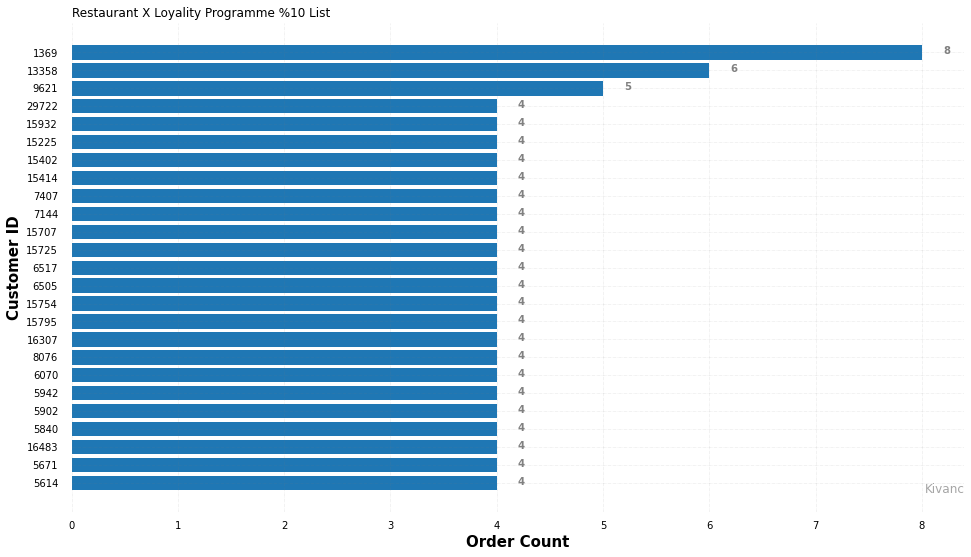

In [106]:
customer_id = data['customer_id'].astype(str)
order_count = data['order_id']

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(customer_id, order_count)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Restaurant X Loyality Programme %10 List',loc ='left')
 
# Add Text watermark
fig.text(0.9, 0.15, 'Kivanc', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.xlabel('Order Count', fontweight ='bold', fontsize = 15)
plt.ylabel('Customer ID', fontweight ='bold', fontsize = 15)
# Show Plot
plt.show()

Plotly

In [20]:
figy = px.bar(
    data, x='order_id', y="customer_id", orientation='h', color='order_id', 
    color_continuous_scale=px.colors.sequential.haline,
    title='Loyality Programme %10'
)
figy.update_xaxes(title='Order Count', showticklabels=True)
figy.update_yaxes(title='Product ID', showticklabels=True, autorange="reversed")
figy.show()

Just One time Order

In [16]:
unsatisfied_customer_df = final_df.groupby(['name','customer_id'])['order_id'].count().sort_values(ascending=True).reset_index()
unsatisfied_customer_df.rename(columns={"order_id":"order_count"},inplace=True)
unsatisfied_customer_df[unsatisfied_customer_df['order_count'] <= 1]

,name,customer_id,order_count
0,(Fifth Avenue Hotel?},12,1
1,Society Of Colonial Wars In The State Of New J...,6256,1
2,Society Of Colonial Wars In The State Of New J...,6260,1
3,Society Of Colonial Wars In The State Of New J...,6291,1
4,Society Of Colonial Wars In The State Of New J...,6328,1
...,...,...,...
23239,Kalils Restaurant,6653,1
23240,The Hotel Roosevelt,12170,1
23241,The Lyric Theatre,19288,1
23242,The Pullman Company,10068,1
